In [35]:
from datetime import datetime 
import pandas as pd
from utils import simulator_period,save_sim_resuls
from subjects.corr_coef import CorrCoeff,TrendFunc
import numpy as np
import matplotlib.pyplot as plt

In [2]:
casino_fig=pd.read_csv('casino_fig.csv', parse_dates = ['Date'])

In [3]:
casino_fig.head()

,Date,Heads,Day_Result,Total_Bets,Total_Hands
0,2022-01-01,31,4382.987842,119021.246790,5336
1,2022-01-02,22,-1262.186515,52535.577473,1710
2,2022-01-03,14,2164.049909,23427.252687,1337
3,2022-01-04,11,353.796534,50474.942623,859
4,2022-01-05,14,1293.859597,58254.208463,3150


In [4]:
casino_fig.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1097 entries, 0 to 1096
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         1097 non-null   datetime64[ns]
 1   Heads        1097 non-null   int64         
 2   Day_Result   1097 non-null   float64       
 3   Total_Bets   1097 non-null   float64       
 4   Total_Hands  1097 non-null   int64         
dtypes: datetime64[ns](1), float64(2), int64(2)
memory usage: 43.0 KB


<Axes: xlabel='Date'>

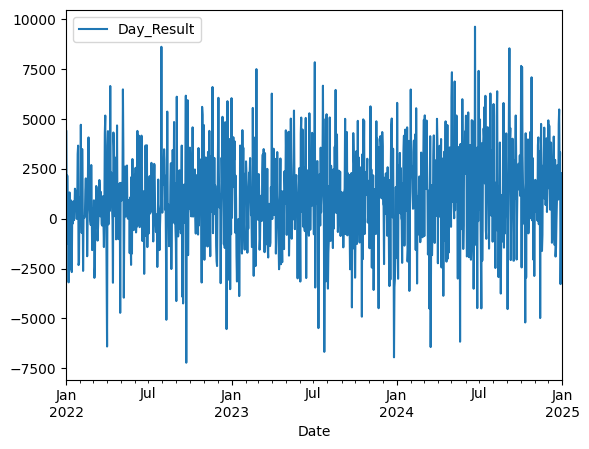

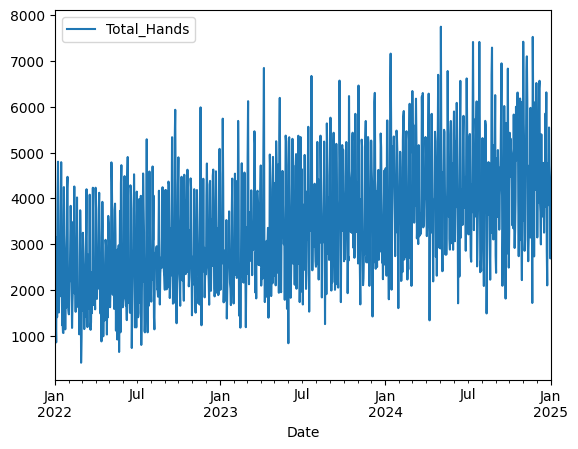

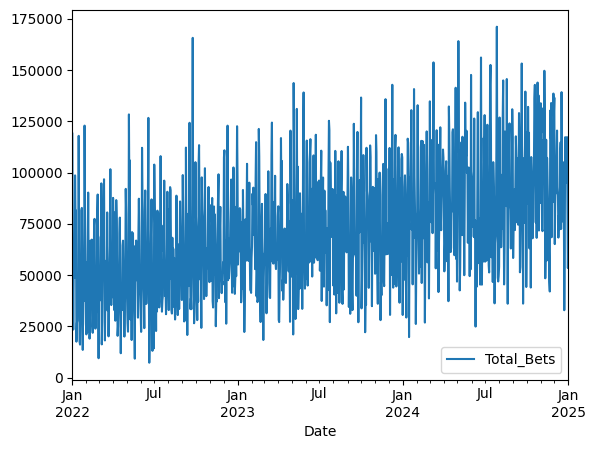

In [5]:
casino_fig[:].plot(x="Date", y ="Day_Result")
casino_fig[:].plot(x="Date", y ="Total_Hands")
casino_fig[:].plot(x="Date", y ="Total_Bets")


In [6]:
casino_fig['Day_Result_roll'] = casino_fig['Day_Result'].rolling(window=7).mean()

<Axes: xlabel='Date'>

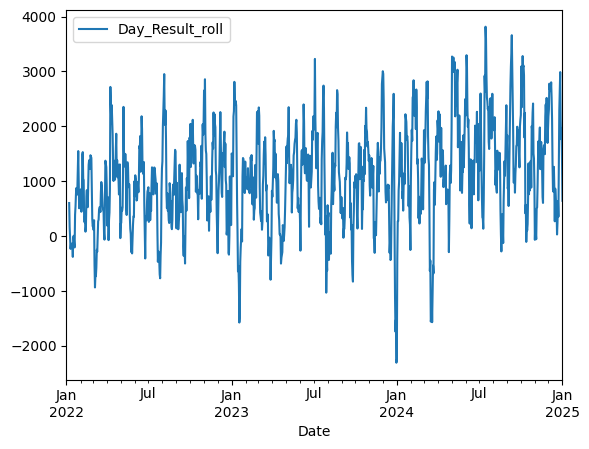

In [7]:
casino_fig.plot(x="Date", y ="Day_Result_roll")

In [8]:
from scipy.signal import medfilt

In [9]:
casino_fig['Day_Result_med'] = medfilt(casino_fig['Day_Result'], kernel_size=49)

<Axes: xlabel='Date'>

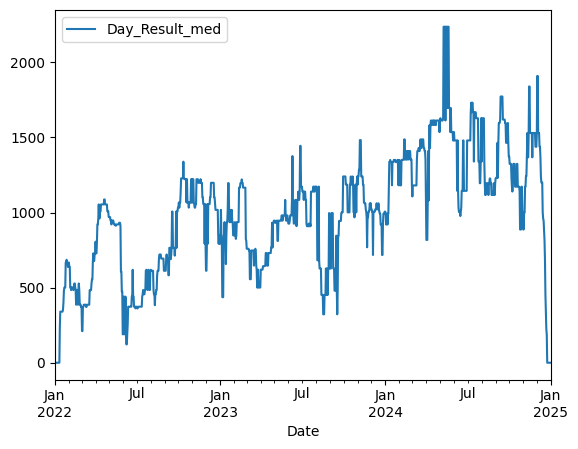

In [10]:
casino_fig.plot(x="Date", y ="Day_Result_med")

In [11]:
casino_fig['Day_Result_ewm'] = casino_fig['Day_Result'].ewm(span=7, adjust=True).mean()


<Axes: xlabel='Date'>

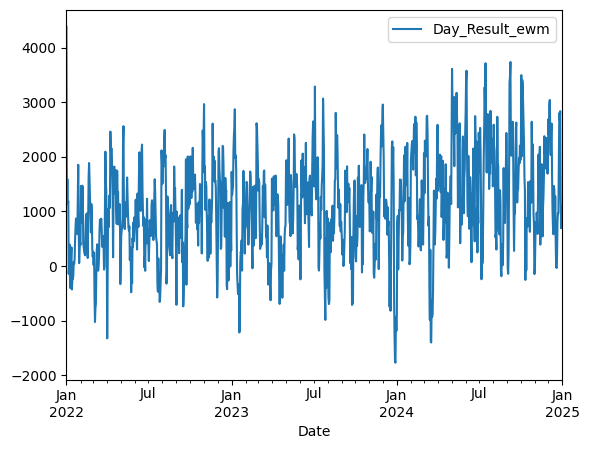

In [12]:
casino_fig.plot(x="Date", y ="Day_Result_ewm")

In [13]:
casino_fig.head()

,Date,Heads,Day_Result,Total_Bets,Total_Hands,Day_Result_roll,Day_Result_med,Day_Result_ewm
0,2022-01-01,31,4382.987842,119021.246790,5336,NaN,0.0,4382.987842
1,2022-01-02,22,-1262.186515,52535.577473,1710,NaN,0.0,1157.173923
2,2022-01-03,14,2164.049909,23427.252687,1337,NaN,0.0,1592.579755
3,2022-01-04,11,353.796534,50474.942623,859,NaN,0.0,1139.539034
4,2022-01-05,14,1293.859597,58254.208463,3150,NaN,0.0,1190.122983


In [14]:
casino_fig['Day_Result_ewm_4'] = casino_fig['Day_Result_ewm'].ewm(span=4, adjust=True).mean()

<Axes: xlabel='Date'>

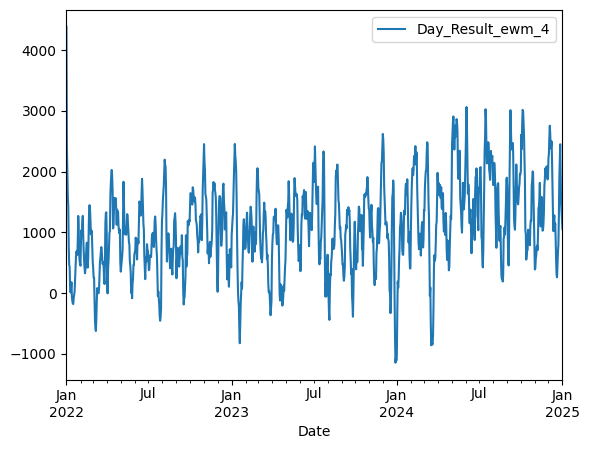

In [15]:
casino_fig.plot(x="Date", y ="Day_Result_ewm_4")

In [16]:
casino_fig['Day_Result_ewm_4_12'] = casino_fig['Day_Result_ewm_4'].ewm(span=72, adjust=True).mean()

<Axes: xlabel='Date'>

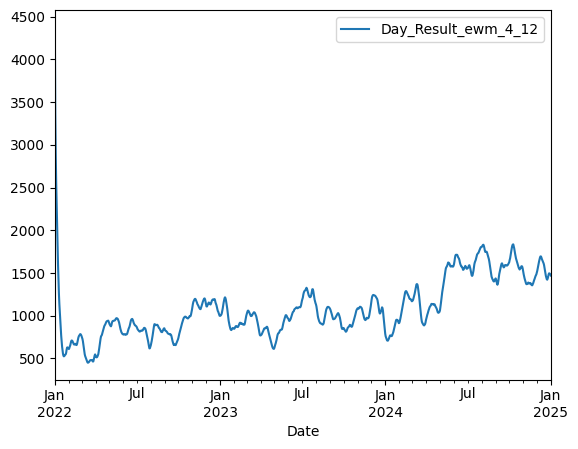

In [17]:
casino_fig.plot(x="Date", y ="Day_Result_ewm_4_12")

In [18]:
casino_fig['Day_Result_ewm'] = casino_fig['Day_Result'].ewm(span=365, adjust=True).mean()

<Axes: xlabel='Date'>

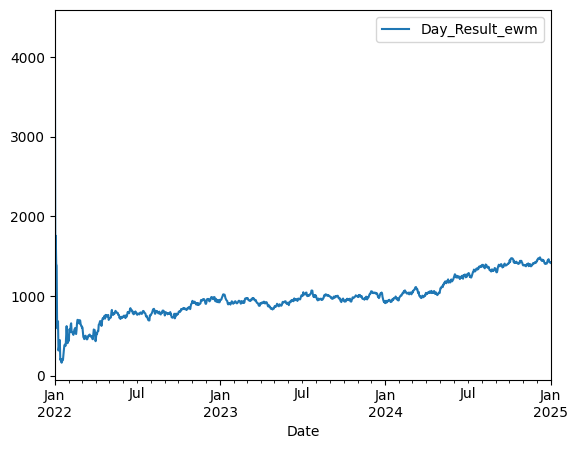

In [19]:
casino_fig.plot(x="Date", y ="Day_Result_ewm")

In [20]:
casino_fig['Total_Bets_ewm'] = casino_fig['Total_Bets'].ewm(span=365, adjust=True).mean()

<Axes: xlabel='Date'>

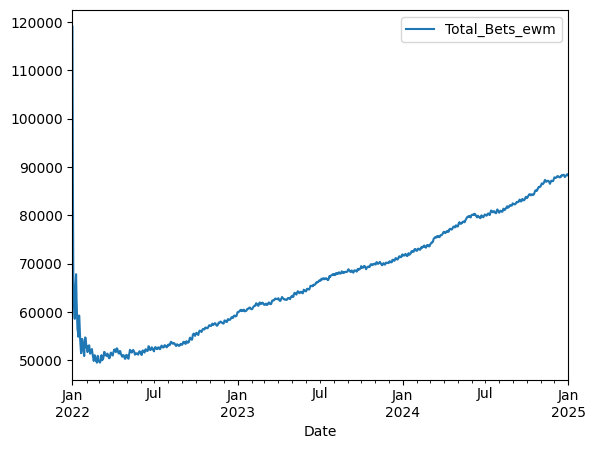

In [21]:
casino_fig.plot(x="Date", y ="Total_Bets_ewm")

In [22]:
from scipy import stats

In [23]:
slope, intercept, r, p, std_err = stats.linregress(casino_fig.index,casino_fig['Total_Bets'])

In [24]:
intercept


np.float64(48595.32265384414)

In [25]:
casino_fig['trend_bet']= slope*casino_fig.index+intercept

<Axes: xlabel='Date'>

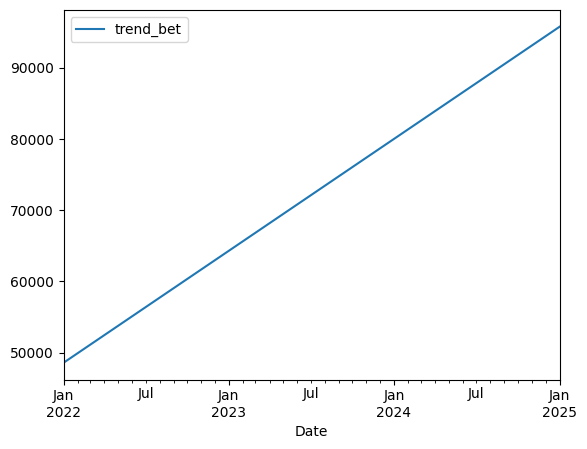

In [26]:
casino_fig.plot(x="Date", y ="trend_bet")

In [56]:
casino_fig['trend_free'] = casino_fig['Total_Bets']-casino_fig['trend_bet'] + intercept

<Axes: xlabel='Date'>

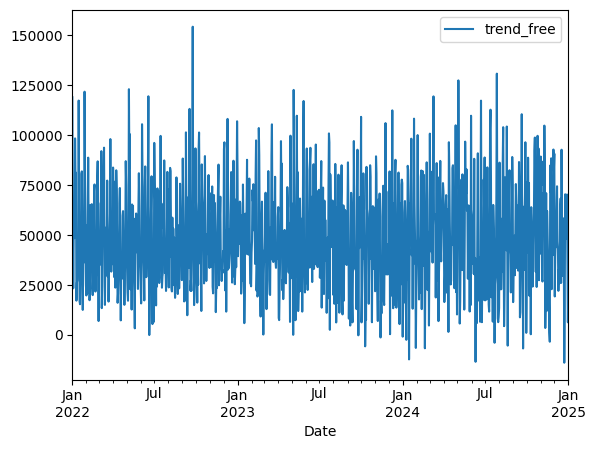

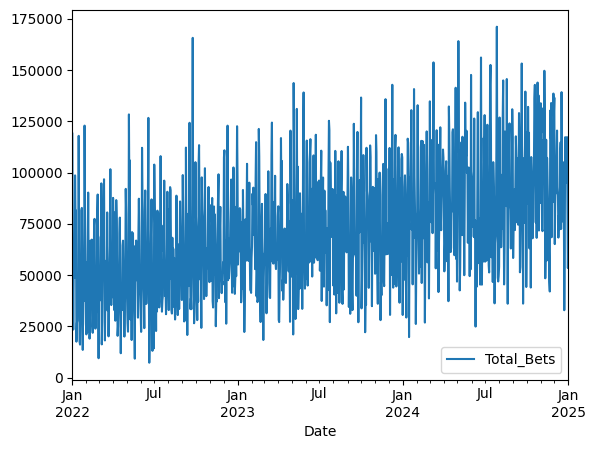

In [57]:
casino_fig.plot(x="Date", y ="trend_free")
casino_fig.plot(x="Date", y ="Total_Bets")

In [58]:
# Perform cubic fit
coefficients = np.polyfit(casino_fig.index,casino_fig['Total_Bets'], 1)
print(coefficients)

[4.30448369e+01 4.85953227e+04]


In [59]:
p = np.poly1d(coefficients)

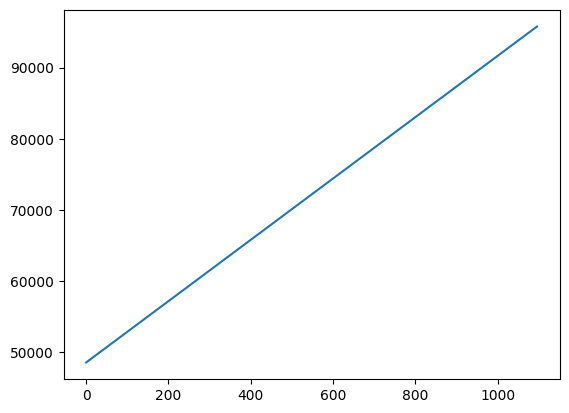

In [60]:
plt.plot(casino_fig.index,p(casino_fig.index))

In [61]:
casino_fig['Date'].iloc[0].weekday() 

5

In [62]:
casino_fig['week_day'] = casino_fig['Date'].dt.dayofweek

In [63]:
casino_fig['week_day']

0       5
1       6
2       0
3       1
4       2
       ..
1092    5
1093    6
1094    0
1095    1
1096    2
Name: week_day, Length: 1097, dtype: int32

In [65]:
casino_fig.groupby('week_day')['trend_free'].mean()

week_day
0    26102.731641
1    33301.565901
2    41149.004975
3    34967.469176
4    72682.194488
5    74437.903909
6    57593.006438
Name: trend_free, dtype: float64

In [98]:
bet_df =casino_fig.groupby('week_day')['trend_free'].agg([ 'mean','std'])

In [99]:
bet_df['low_res'] = bet_df['mean'] - 2* bet_df['std']
bet_df['high_res'] = bet_df['mean'] + 2* bet_df['std']

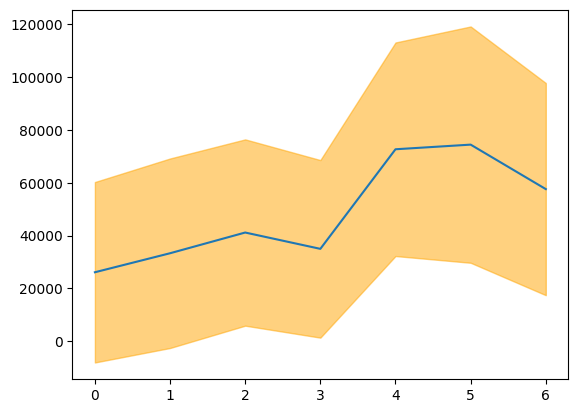

In [100]:
plt.plot(bet_df.index ,bet_df['mean'] )
plt.fill_between(bet_df.index, bet_df['low_res'], bet_df['high_res'], alpha=0.5, color='orange')

In [101]:
bet_df.index

Index([0, 1, 2, 3, 4, 5, 6], dtype='int32', name='week_day')

In [102]:
casino_fig.tail(10)

,Date,Heads,Day_Result,Total_Bets,Total_Hands,Day_Result_roll,Day_Result_med,Day_Result_ewm,Day_Result_ewm_4,Day_Result_ewm_4_12,Total_Bets_ewm,trend_bet,trend_free,week_day
1087,2024-12-23,22,960.350693,32869.583672,2874,352.840564,184.982333,1407.674126,794.165380,1427.461911,88066.846515,95385.060371,-13920.154045,0
1088,2024-12-24,20,4739.488299,61896.058377,2102,1301.259767,0.000000,1425.927518,1241.154328,1422.357594,87923.469475,95428.105208,15063.275823,1
1089,2024-12-25,33,5479.439299,117294.342698,4760,2293.398431,0.000000,1448.134429,1866.127851,1434.515683,88084.375969,95471.150045,70418.515307,2
1090,2024-12-26,31,2281.496856,109211.574340,4705,2637.437414,0.000000,1452.699890,2188.902838,1455.183824,88200.118391,95514.194882,62292.702112,3
1091,2024-12-27,45,3326.560510,95094.298933,3852,2987.781640,0.000000,1462.965432,2447.917349,1482.382003,88237.886677,95557.239719,48132.381868,4
1092,2024-12-28,39,-3281.048333,109100.784598,5546,2134.868919,0.000000,1436.976731,1991.577310,1496.332560,88352.178001,95600.284556,62095.822696,5
1093,2024-12-29,38,-1149.484228,117345.388918,4721,1765.257585,0.000000,1422.807751,1472.118139,1495.669151,88511.006701,95643.329393,70297.382179,6
1094,2024-12-30,22,2284.037727,82400.375329,4464,1954.355733,0.000000,1427.525620,1319.553471,1490.844064,88477.532300,95686.374229,35309.323753,0
1095,2024-12-31,22,815.973758,53448.932256,2690,1393.853656,0.000000,1424.175548,1200.541399,1482.890566,88285.646153,95729.419066,6314.835844,1
1096,2025-01-01,21,226.088608,71544.451083,4199,643.374985,0.000000,1417.612534,1049.540688,1471.017967,88193.939375,95772.463903,24367.309833,2


In [103]:
casino_fig['Total_Bets'][1087:1094]

1087     32869.583672
1088     61896.058377
1089    117294.342698
1090    109211.574340
1091     95094.298933
1092    109100.784598
1093    117345.388918
Name: Total_Bets, dtype: float64

In [104]:
casino_fig['week_day'][1087:1094]

1087    0
1088    1
1089    2
1090    3
1091    4
1092    5
1093    6
Name: week_day, dtype: int32

In [105]:
bet_df['mean']  = casino_fig.index[1087:1094]*slope + bet_df['mean']

In [109]:
bet_df['low_res'] = bet_df['mean'] - 3* bet_df['std']
bet_df['high_res'] = bet_df['mean'] + 3* bet_df['std']

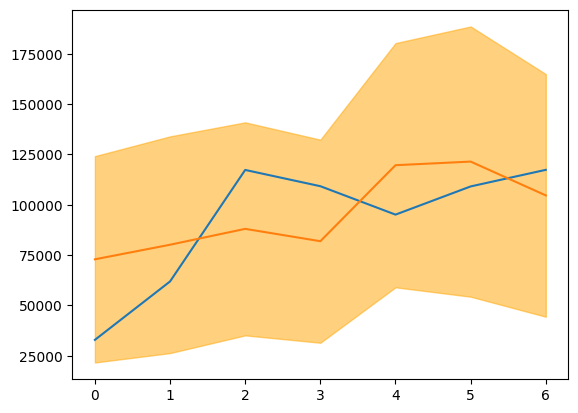

In [110]:
plt.plot(bet_df.index ,casino_fig['Total_Bets'][1087:1094] )
plt.plot(bet_df.index ,bet_df['mean'] )
plt.fill_between(bet_df.index, bet_df['low_res'], bet_df['high_res'], alpha=0.5, color='orange')

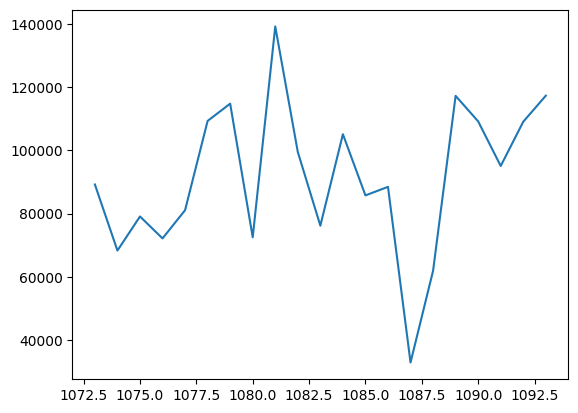

In [113]:
plt.plot(casino_fig['Total_Bets'][1073:1094] )